In [9]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import sys, os

sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import custom_plot_objects as cpo

import ModelFramework as mf
import ModelFramework.Elements as ele
import ModelFramework.ExternalForces as ef
import FwtModels.RectWing as rw
import custom_plot_objects as cpo

from matplotlib.lines import Line2D

me.mechanics_printing()

In [10]:
#%%time
flutdf = pd.DataFrame()


angles = [-15,-7.5,0,7.5,15]

ls = []
for ang in angles:
    dat = pd.read_pickle(f'Test_FWT_Locked_{ang}_degrees.pkl')
    ls.append(dat)
    
flutdf = pd.concat(ls, ignore_index=True, sort=False)

flutdf = flutdf.reset_index(drop=True)
flutdf['Damping [%]'] = flutdf['Damping']*-100
flutdf['Coast Angle [Deg]'] = np.round(np.rad2deg([i[-1] for i in flutdf['q']]),1)
flutdf['Flare Angle [Deg]'] = pd.Categorical(np.rad2deg(flutdf['Lambda']))
flutdf['AoA [Deg]'] = pd.Categorical(np.rad2deg(flutdf['alpha_r']))
flutdf['Mode'] = pd.Categorical(flutdf['Mode'])
flutdf['Stable'] = pd.Categorical(flutdf['Stable'])
flutdf['C_D max'] = pd.Categorical(flutdf['C_Dmax'])

No handles with labels found to put in legend.


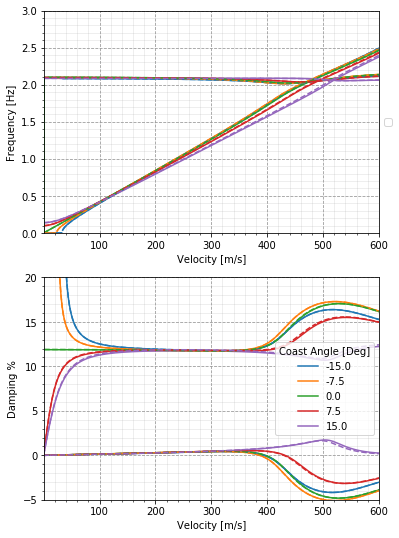

In [11]:
fig, axes = plt.subplots(2,1,figsize=(6,9))  

filter_dict = {'Flare Angle [Deg]':[25],'AoA [Deg]':[5],'Mode':[0,1],'Stable':None}

Tests = [5]
data = cpo.GetReducedDataSet(flutdf,filter_dict)
data['Coast Angle [Deg]'] = pd.Categorical(data['Coast Angle [Deg]'])

cpo.FlutterPlot(data,x = 'V',style = 'C_D max', Modes = 'Mode',hue = 'Coast Angle [Deg]',y = 'Frequency',ax = axes[0],legend=False)
cpo.FlutterPlot(data,x = 'V',style = 'C_D max',Modes = 'Mode',hue = 'Coast Angle [Deg]',y = 'Damping [%]',ax = axes[1])

#cpo.PlotLines(data[data['Mode']==0],x='V',y='Coast Angle [Deg]',ax = axes[2],hue = 'Coast Angle [Deg]',legend = False)

#print(np.unique(data['c_dmax']))
for i in [0,1]:
    #axes[i].set(xlim=(0,60))
    axes[i].grid(b=True, which='major', color='#999999', linestyle='--')
    axes[i].minorticks_on()
    axes[i].grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    #axes[i].set(xlim=(0,40))
    

axes[0].set_ylabel('Frequency [Hz]')
axes[1].set_ylabel('Damping %')
axes[0].set_xlabel('Velocity [m/s]')
axes[1].set_xlabel('Velocity [m/s]')

axes[0].set(xlim=(1,data['V'].max()))

styles = ['-','--']
lines = [Line2D([0], [0], color='grey', linewidth=1, linestyle=c) for c in styles]
labels = ['0','1']
axes[0].legend(lines, labels,title='$C_{Dmax}$')

axes[0].set(xlim=(1,data['V'].max()-300))
axes[1].set(xlim=(1,data['V'].max()-300))

axes[0].set(ylim=(0,3))
axes[1].set(ylim=(-5,20))  
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
#axes[2].set(ylim=(-90,90))  

In [12]:
ls=[]
test = data[data['Stable']==False]
test = test[test['V']>100]
for i in test['Coast Angle [Deg]'].unique():
    coast_data = test[test['Coast Angle [Deg]']==i]
    for j in test['C_D max'].unique():
        temp = coast_data[coast_data['C_D max']==j]
        flutter_speed = temp['V'].min()
        ls.append({'V':flutter_speed,'C_D':j,'Coast':i})
pd.DataFrame(ls)


,V,C_D,Coast
0,395.0,0.0,-15.0
1,395.0,1.0,-15.0
2,387.0,0.0,-7.5
3,387.0,1.0,-7.5
4,397.0,0.0,0.0
5,397.0,1.0,0.0
6,432.0,0.0,7.5
7,430.0,1.0,7.5
